In [1]:
from net.net import model
import pandas as pd
from utils.dataset import FaceKeyPointsDatasets
from PIL import Image
from utils.transforms import RandomCrop,Resize,Normalize
import numpy as np
from matplotlib import pyplot as plt

In [2]:
resize = Resize(256)
crop = RandomCrop(240)
norm = Normalize(scale=100)

In [3]:
image = Image.open("data/test/Christopher_Walken_40.jpg").convert("RGB")
image = np.array(image)
kps = np.ones((136))
image,kps = resize([image,kps])
image,kps_new = crop([image,kps])
image,kps = norm([image,kps_new])
print(kps.shape,image.shape)
net = model
net.load_weights("weights/face_240_240_50.h5")
out = net.predict(np.expand_dims(image, axis=0))
out = np.array(out).reshape(-1)

(136,) (240, 240, 3)
1/1 [==============================] - 3s 3s/step


In [4]:
out = out * 100

In [5]:
def show_keypoints(image, key_pts):
    """
    Args:
        image: 图像信息
        key_pts: 关键点信息，
    展示图片和关键点信息
    """
    plt.imshow(np.array(image,dtype=np.uint8))  # 展示图片信息
    for i in range(len(key_pts)//2,):
        plt.scatter(key_pts[i*2], key_pts[i*2+1], s=20, marker='.', c='b') # 展示关键点信息

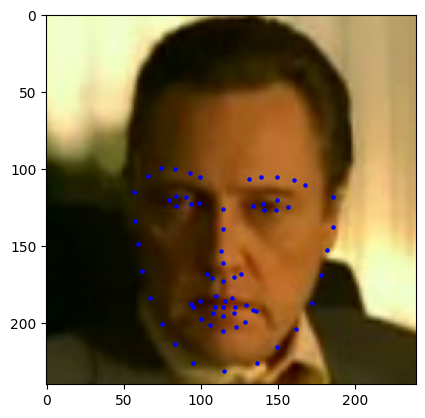

In [6]:
show_keypoints(image,out)

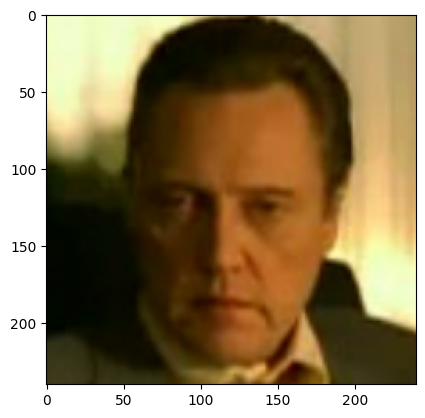

In [7]:
plt.imshow(image)